In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import ensemble

In [2]:
cali = pd.read_csv('CALI.csv')

In [3]:
df_x = cali.iloc[:, 0:8]
df_y = cali.iloc[:, 8]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

In [5]:
# Gradient boosting in action...
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500)

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_train,y_train)
print('R2 sq: ',model_score)

y_predicted = model.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

R2 sq:  0.8043405623940919
Mean squared error: 0.28
Test Variance score: 0.78


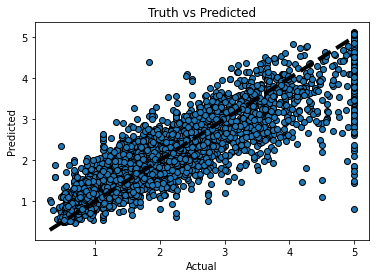

In [7]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Truth vs Predicted")
plt.show()

**Interpretation:**

We use the training set to build the model and find that `R squared` is 0.80, which is closer to 1 compared with the linear regression. Therefore, gradient boosting may perform better than linear regression. Then, we use test set to predict, and the `MSE` between predicted value and actual value is 0.28, which is lower than that of linear regression. And the `Test Variance socre` is 0.78, which is also closer to 1 compared with linear regression. And from the final graph, we can see that the actual values are centered around the prediced line. Therefore, we may claim that gradient boosting is generally doing better than linear regression for this data set.